# Lab 1: Linear Regression

In this practice session, you are invited to train a linear regression model using gradient descent method. After the learning phase, your model should predict house prices in the region of *"Ile-de-France"* given their areas (in m²) and their numbers of rooms.

We will also enhace the perfomence of the learning algorithm using different implementation techniques like vectorization and features normalization.

### Import libraries and load data
Import **numpy** library that support matrix operation and **matplotlib** library for plotting data.  
<font color="blue">**Question 1: **</font>The *"house.csv"* file contains 3 columns that represent the area, the number of rooms and the price of 600 houses (one per row). 
- Open this file with a file editor to understand more the data. 
- Load the data in "house_data" variable and check its size.  
**Hint:** You could use [loadtxt](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.loadtxt.html) function from numpy library.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

house_data=np.loadtxt('house.csv') 
# you could verify the size of the data using shape() function on numpy array house_data
print(house_data.shape)
print(house_data)

(600, 3)
[[ 122.    6.  361.]
 [ 125.    6.  759.]
 [  79.    4.  584.]
 ..., 
 [  86.    4.  332.]
 [  64.    3.  246.]
 [ 100.    5.  249.]]


### Linear regression with 1 feature (house area)

In this first part, we will train a linear model for house price prediction using only one feature the house area. We will start by implementing a cost function and the gradient of this cost function. Then, we will implement the gradient descent algorithm that minimizes this cost function and determine the linear model parameter $\theta$ in the equation $h_\theta(x)=\theta_1 x$.  

<font color="blue">**Question 2: **</font> 
- Determine the number of samples "m" from the input data "house_price".
- Extract the house area and price columns respectively in "x_1" and "y" arrays to visualize them.  
**Hint:** The shape of "x_1" and "y" arrays should be (m,1) for the following questions and not (m,). You could use [newaxis numpy](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#basic-slicing-and-indexing) object to add a new axis of length one.

(600, 1)


<IPython.core.display.Javascript object>


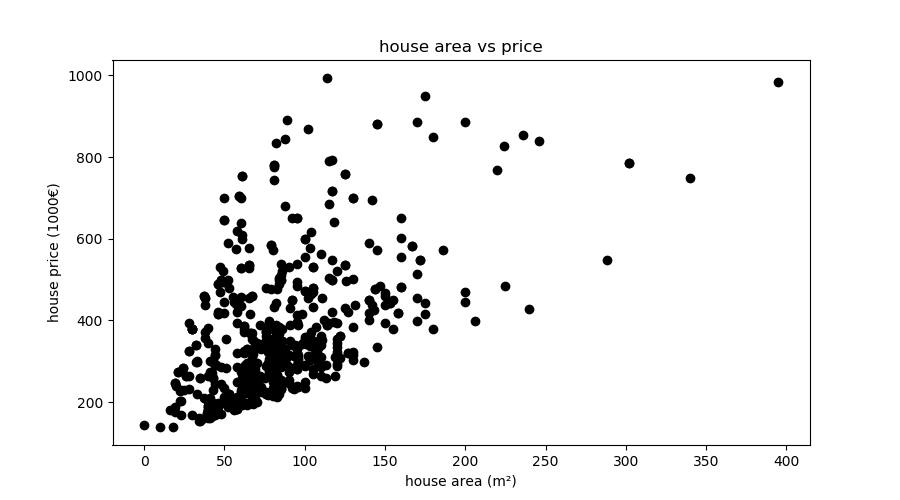

Text(0.5,1,'house area vs price')

In [20]:
%matplotlib notebook

m = house_data.shape[0] # number of sample
n = 1                   # number of features
x_1 = house_data[:,0,np.newaxis] # we add np.newaxis in the indexing to obtain an array 
print(x_1.shape)                 # with shape (600,1) instead of (600,)
X = x_1
y = house_data[:,2,np.newaxis] # we add np.newaxis in the indexing to obtain an array with shape (600,1) instead of (600,)
plt.figure("Visualize house data",figsize=(9,5))
plt.scatter(x_1, y,  color='black')
plt.xlabel('house area (m²)')
plt.ylabel('house price (1000€)')
plt.title('house area vs price')

<font color="Green"><u>_**Observation:**_</u></font>   We note a pattern in the data scatter. it is spread on both side of a line. Hence, the house area and price are correlated and we could build a model that try to predict a house price based on its area.

#### Cost function
The cost function we will use for this linear model training is the **Mean Squared Error (MSE)**: $$cost\_func(x) = \frac{1}{2~m} \sum_{i=1}^{m}{(h_\theta(x_i) - y_i)^2}$$

<font color="blue">**Question 3: **</font> 
- Implement the "cost_func" function that evaluate and return the previous equation of MSE. 

Cost function for theta=[-3.] is : 223393.47166666668


<IPython.core.display.Javascript object>


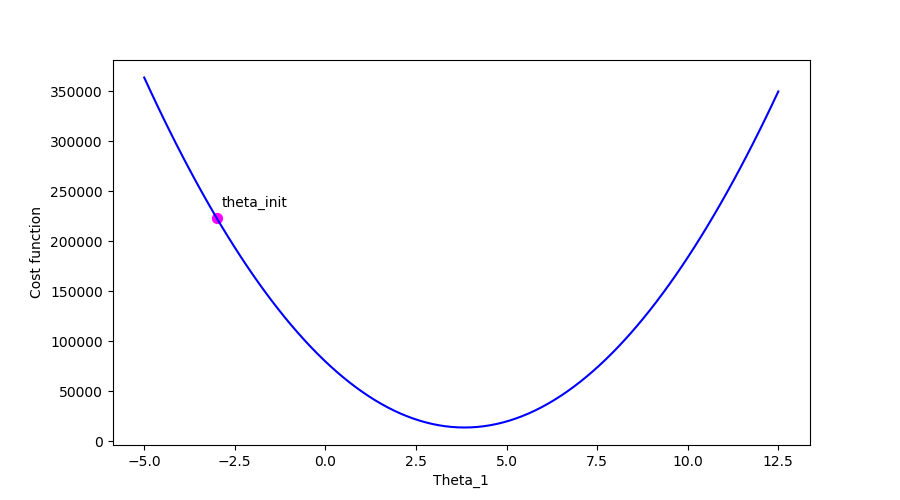

Text(0,0.5,'Cost function')

In [26]:
def cost_func(theta):
    # this is the for loop implementation
    '''
    J=0
    for i in range(m):
        h_i=0
        for j in range(n):
            h_i+=X[i,j]*theta[j,0]
        J+=(h_i-y[i,0])**2
    return J/(2*m)
    '''
    return 1/(2*m)*np.sum((np.dot(X,theta)-y)**2)  # this is the vectorized implementation

# evaluate cost function at theta_init
theta_init=np.array([[-3]],dtype=float)
cost = cost_func(theta_init)
print("Cost function for theta={0} is : {1}".format(theta_init[:,0],cost))

# evaluate cost function at a range of theta to plot it
theta_1 = np.linspace(-5,12.5,100)
J=[]
for i in range(theta_1.shape[0]):
    J.append(cost_func(np.array([[theta_1[i]]])))

# plot the cost function
plt.figure('Cost Function J(theta)',figsize=(9,5))
plt.plot(theta_1, J,  color='blue')
plt.scatter(theta_init[0,0],cost,marker='o',s=50,color="magenta")
plt.annotate("theta_init", (0.95*theta_init[0,0],1.05*cost))
plt.xlabel('Theta_1')
plt.ylabel('Cost function')


<font color="Green"><u>_**Observation:**_</u></font>   We note that the cost function is convex function that have a minimum around 3,8. Hence, the gradient descent algorithm should converge to the global minimum if it was well tuned (suitable value of steplenght $\alpha$).

#### Gradient of cost function
The gradient of the Mean Squared Error cost function is calculated as following: $$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m}{(h_\theta(x_i) - y)~x_j} ~~for~ j=0\dots n-1$$
<font color="blue">**Question 4: **</font> 
- Implement the "grad_cost_func" function that evaluates the gradient of the cost function at the point theta considering the $j^{th}$ component as given on the previous equation.

Gradient for theta=[-3.] is : [-61337.67]


<IPython.core.display.Javascript object>


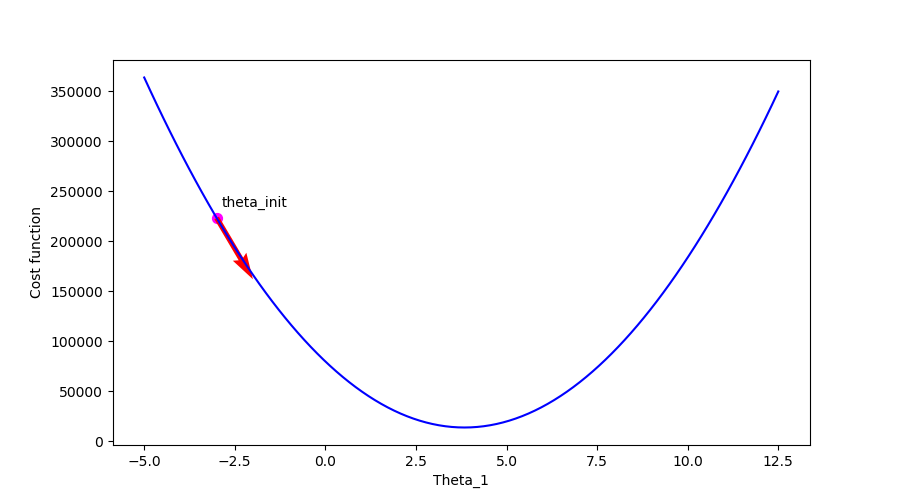

'\n# plot cost function, theta_init point and the gradient direction\nplt.figure(\'Gradient Vector Of Cost Function J(theta)\',figsize=(9,5))\nplt.plot(theta_1, J,  color=\'blue\')\nplt.scatter(theta_init[0,0],cost,marker=\'o\',s=50,color="magenta")\nplt.annotate("theta_init", (0.95*theta_init[0,0],1.05*cost))\nplt.xlabel(\'Theta_1\')\nplt.ylabel(\'Cost function\')\n#\'\'\'\n# plot the gradient direction: use this quiver plotting for a convergent simulation \nplt.quiver(theta_init[0,0],cost,1/(1+exp(grad[0,0]))-0.5,(1/(1+exp(grad[0,0]))-0.5)*grad[0,0],color=\'red\',scale=0.5,scale_units=\'xy\',angles=\'xy\')\nplt.plot(theta_1, J,  color=\'blue\')\n\'\'\'\n# use this quiver plotting for a divergent simulation \nplt.quiver(theta_init[0,0],cost,-0.1*grad[0,0],-0.1*grad[0,0]*grad[0,0],color=\'red\',scale=0.5,scale_units=\'xy\',angles=\'xy\')\n\n# evaluate cost function at an suitable range of theta to plot it\ntheta_1bis = np.linspace(-1.1*fabs(theta_init[0,0]),1.1*fabs(theta_init[0,0]),10

In [30]:
from math import exp, fabs
def grad_cost_func(theta,j=None):
    # in this case, j is not specified so we calculate all the gradient vector (see nabla vector at slide 6)
    if (j==None):
        # this is the for loop implementation
        '''
        grad=np.zeros((n,1))
        for i in range(m):
            h_i=0
            for k in range(n):
                h_i+=X[i,k]*theta[k,0]
            for j in range(n):
                grad[j,0]+=(h_i-y[i,0])*X[i,j]
        return grad/m
        '''
        return (1/(m))*(np.dot(X.transpose(),(np.dot(X,theta)-y)))  # this is the vectorized implementation
    # in this case, j is specified then we only calculate the partial derivative with respect to theta_j (see slide 4)
    else:
        # this is the for loop implementation
        grad=np.zeros((1,1))
        for i in range(m):
            h_i=0
            for k in range(n):
                h_i+=X[i,k]*theta[k,0]
            grad+=(h_i-y[i,0])*X[i,j]
        return grad/m
        # this is the vectorized implementation but in this case no need to calculate all the gradient vector
        # since we only need one component of the gradient vector (with respect to theta_j)
        '''
        return (1/(m))*(np.dot(X.transpose(),(np.dot(X,theta)-y))[j,0]
        '''

# evaluate gradient of cost function at theta_init with respect to theta_0
grad=grad_cost_func(theta_init,0)
print("Gradient for theta={0} is : {1}".format(theta_init[:,0],grad[:,0]))

#"""
# comment this block if you want to see the simulation and visualizing the update of theta_init
# plot cost function, theta_init point and the gradient direction
plt.figure('Gradient Vector Of Cost Function J(theta)',figsize=(9,5))
plt.plot(theta_1, J,  color='blue')
plt.scatter(theta_init[0,0],cost,marker='o',s=50,color="magenta")
plt.annotate("theta_init", (0.95*theta_init[0,0],1.05*cost))
plt.quiver(theta_init[0,0],cost,1/(1+exp(grad[0,0]))-0.5,(1/(1+exp(grad[0,0]))-0.5)*grad[0,0],color='red',scale=0.5,scale_units='xy',angles='xy')
plt.xlabel('Theta_1')
plt.ylabel('Cost function')

# uncomment this block if want to see the simulation
"""
# plot cost function, theta_init point and the gradient direction
plt.figure('Gradient Vector Of Cost Function J(theta)',figsize=(9,5))
plt.plot(theta_1, J,  color='blue')
plt.scatter(theta_init[0,0],cost,marker='o',s=50,color="magenta")
plt.annotate("theta_init", (0.95*theta_init[0,0],1.05*cost))
plt.xlabel('Theta_1')
plt.ylabel('Cost function')
#'''
# plot the gradient direction: use this quiver plotting for a convergent simulation 
plt.quiver(theta_init[0,0],cost,1/(1+exp(grad[0,0]))-0.5,(1/(1+exp(grad[0,0]))-0.5)*grad[0,0],color='red',scale=0.5,scale_units='xy',angles='xy')
plt.plot(theta_1, J,  color='blue')
'''
# use this quiver plotting for a divergent simulation 
plt.quiver(theta_init[0,0],cost,-0.1*grad[0,0],-0.1*grad[0,0]*grad[0,0],color='red',scale=0.5,scale_units='xy',angles='xy')

# evaluate cost function at an suitable range of theta to plot it
theta_1bis = np.linspace(-1.1*fabs(theta_init[0,0]),1.1*fabs(theta_init[0,0]),100)
Jbis=[]
for i in range(theta_1.shape[0]):
    Jbis.append(cost_func(np.array([[theta_1bis[i]]])))
plt.plot(theta_1bis, Jbis,  color='blue')
'''
# do a step of gradient descent algorithm: update theta_init with this equation (see slide 5)
# for steplength alpha = 0.00003/0.0001 or smaller --> simulation converge 
# for steplength alpha = 0.0003 or bigger --> simulation diverge
theta_init=theta_init-0.00003*grad 

#evaluate cost function at the new theta_init
cost = cost_func(theta_init)
print("Cost function for theta={0} is : {1}".format(theta_init[:,0],cost))

#plot the linear model obtained by the current theta_init
prediction=np.dot(X,theta_init)
fig=plt.figure('Linear Model Stepping',figsize=(9,5))
plt.scatter(x_1, y,  color='black')


plt.plot(np.sort(x_1,axis=0),prediction[np.argsort(x_1,axis=0),0], color='red', linewidth=3)
"""

<font color="Green"><u>_**Instructions:**_</u></font>   
- For simulation: don't forget to uncomment lines: 49-88 and comment lines: 37-46 
- For convergent simulation: don't forget to comment lines: 61-71, uncomment lines: 57-60 and set $\alpha$ to 0.0001
- For divergent simulation: don't forget to comment lines: 57-60, uncomment lines: 61-71 and set $\alpha$ to 0.0003

<font color="Green"><u>_**Observations:**_</u></font>   
- We note that the direction of gradient point toward the minimum of the cost function.
- When we uncomment the simulation code and run it, we see that moving theta successive small steps in the direction of the gradient will get closer and closer to the optimal theta that minimize cost function. In this case, the steplength $\alpha$ was small enough ($\leq 0.0001$) to make our iteration process converge.
- When setting $\alpha \geq 0.0003$ and uncomment the divergent simulation code, we note that the update equation make theta move huge steps to the point that it overstep the minimum of the cost function and it will get bigger and bigger through steps. So for high value of $\alpha$ theta will diverge. 

#### Gradient descent algorithm
The gradient descent algorithm is a downhill iterative optimization method that uses the gradient direction as descending direction on each step to reach a local minimum. For a convex function, such as the MSE cost function, the gradient descent is guaranteed to reach a global minimum.  
The update equation of the optimization parameter $\theta$ is given by: $$\theta_j=\theta_j-\alpha \frac{\partial J(\theta)}{\partial \theta_j} ~~for~ j=0\dots n-1$$
Where $\alpha:$ represents the step or the learning rate.

<font color="blue">**Question 5: **</font> 
- Implement the "grad_descent" algorithm that updates, iteratively, the parameter vector theta  according to the previous equation.  
- Call "grad_descent" function to calculate "theta_opt". you could use "max_iteration" of 1000 and "alpha" equal to 0.0001.  
- Use the calculated "theta_opt" to estimate the price of a house with 330 m² area.  

<font color="blue">**Question 5' (homework): **</font>  
Note that calculation time taken by gradient descent is in the range of a second. In order to enhance the performance of our algorithm, we could re-write "cost_func", "grad_cost_func" and "grad_descent" functions with a vectorized implementation.  
**Hint:** Use direct operation on arrays like $+,-, \times \dots$ You could also use [dot product](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html), [transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html) and [sum](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.sum.html) functions to calculate sums along vectors rather than using for loop. 

The gradient descent algorithm take 0.0073 s to finish calculation
The optimal value of theta that minimize cost function is:  [ 3.83906876]
Final error =  13647.2002178
The predicted price of a 330 m² house is: 1266.8926918195282 k€


<IPython.core.display.Javascript object>


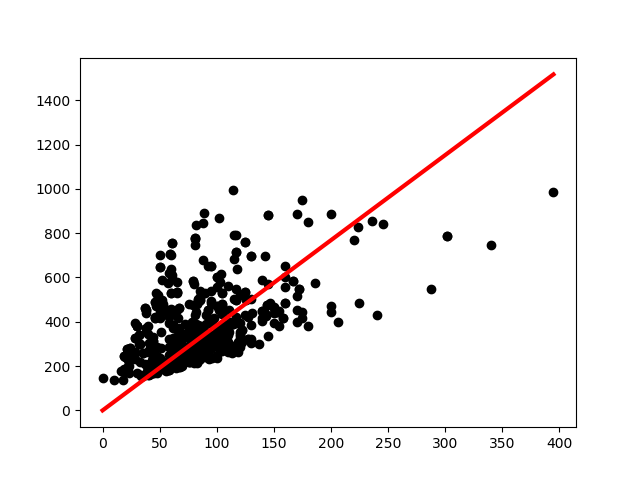

In [31]:
import time

def grad_descent(grad_func, theta0,max_iter=100,alpha=0.0001,gtol=10**(-10)):
    # max_iter: maximum number of iteration or steps to make
    # alpha: steplength or learning rate
    # gtol: gradient tolerance if gradient goes below this value we can say that our algorithm converge
    i=0
    theta=theta0.copy()
    theta_temp=theta0.copy()   # temporal variable theta help to achieve simultaneously update (see slide 5)
    #g=grad_func(theta)
    while (i < max_iter):# and (np.sum(g**2) > gtol):
        i+=1
        g=grad_func(theta)
        theta=theta-alpha*g
        
        # this is the for loop implementation
        '''
        for j in range(n):
            theta_temp[j,0]=theta[j,0]-alpha*grad_func(theta,j)
        for j in range(n):  # this for loop do the simultaneously update of theta
            theta[j,0]=theta_temp[j,0]
        '''
    return theta

# calculate the optimal value of theta that minimize cost function
start_time = time.time()
theta_opt=grad_descent(grad_cost_func,theta_init,max_iter=1000,alpha=0.0001)
print("The gradient descent algorithm take {:.4f} s to finish calculation".format(time.time()-start_time))
print("The optimal value of theta that minimize cost function is: ",theta_opt[:,0])

# predict house price using the calculated value of optimal theta
prediction=np.dot(X,theta_opt)
print("Final error = ",np.sum((prediction-y)**2)/(2*m))

area = 330
price = np.dot(np.array([[area]]),theta_opt)
print("The predicted price of a {0} m² house is: {1} k€".format(area,price[0,0]))

# plot linear model and data 
plt.figure('Regression Model')
plt.scatter(x_1, y,  color='black')
plt.plot(np.sort(x_1,axis=0),prediction[np.argsort(x_1,axis=0),0], color='red', linewidth=3)
 

<font color="Green"><u>_**Observations:**_</u></font> 
- The optimal theta calculated by the gradient descent algorithm is equal to 3,83 and the final error (minimal cost function) is equal to 13647 which is coherent with the minimum observed in the plot of the cost function.
- In the case of for loop implementation, we note that the required time for gradient descent calculation is in the range of the second. Thus, we could resort to vectorized implementation to enhance performance and the required time will be in the range of 10 $ms$.
- The linear model in the figure is a line passing from the origin. This is because the chosen model doesn't have an intercept (bias term). But it seems that our model could do better if there was an intercept.

### Linear regression with 2 features (house area + bias term)

In this part, we will train a linear model for house price prediction using the house area and the bias term that represents the constant term (y-intercept) in the linear model equation $~h_\theta(x)=\theta_1 x+\theta_0$.

<font color="blue">**Question 6: **</font> 
- Build the matrix X with shape (m,2) that represents 2 features: a column of ones that represents the bias term and a column of house area.  
**Hint:** You could use numpy [concatenate](https://docs.scipy.org/doc/numpy/reference/generated/numpy.concatenate.html) function (put two columns or array together).
- Change the value of "n" to be equal to the number of features (number of columns of matrix X equal to 2 in this example).  
- Make all needed modification in "cost_func", "grad_cost_func" and "grad_descent" functions if your implementation was not generalizable for any number of features n.

Cost function for theta=[ 250.     4.5] is : 49717.769583333335
Gradient for theta=[ 250.     4.5] is : [   261.44666667  26839.37166667]
Minimum value of cost function detected on the plot:  9277.28609481
Value of theta_0, theta_1 that minimize the cost function:  198.98989899 1.97478991597


<IPython.core.display.Javascript object>


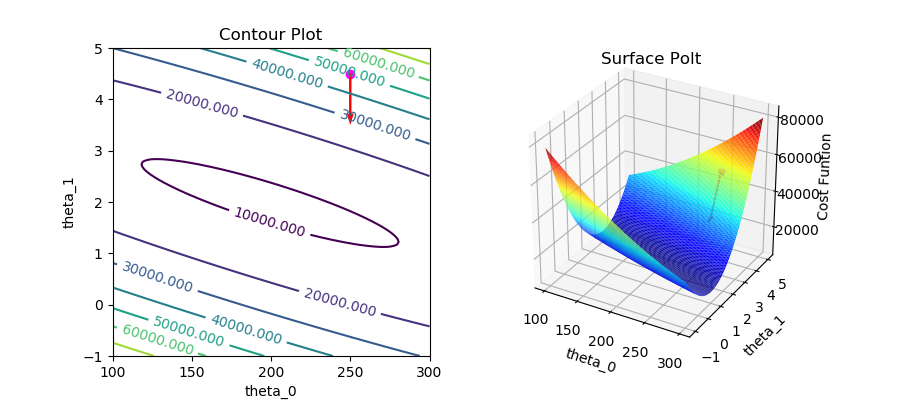

"\nprediction=np.dot(X,theta_init)\nfig=plt.figure('Linear Model (2 features)',figsize=(9,5))\nplt.scatter(x_1, y,  color='black')\nplt.plot(np.sort(x_1,axis=0),prediction[np.argsort(x_1,axis=0),0], color='red', linewidth=3)\n# use alpha <=0.0001 for unnormalized feature and alpha <=0.3 for normalized feature \ntheta_init=theta_init-0.0001*grad \n"

In [32]:
from mpl_toolkits.mplot3d.axes3d import*
from matplotlib import cm
from math import fabs

# unnormalized feature
X = np.concatenate((np.ones((m,1)),x_1),axis=1)
theta_init=np.array([[250],[4.5]],dtype=float) # comment this line for simulation
theta_0 = np.linspace(100,300,100) # you could also use: theta_0 = np.arange(100, 300, 2)
theta_1 = np.linspace(-1,5,120)    # you could also use: theta_1 = np.arange(-1, 5, 0.05)

# Normalized feature (uncomment this block)
'''
X = np.concatenate((np.ones((m,1)),(x_1-x_1.mean())/x_1.std()),axis=1)
#theta_init=np.array([[375],[7]],dtype=float)  # comment this line for simulation 
theta_0 = np.linspace(300,450,100) # you could also use: theta_0 = np.arange(300, 450, 2) 
theta_1 = np.linspace(0,150,100)   # you could also use: theta_1 = np.arange(0, 150, 2)
'''
n = X.shape[1]
# evaluate cost unction and gradient on theta_init point
cost = cost_func(theta_init)
print("Cost function for theta={0} is : {1}".format(theta_init[:,0],cost))
grad=grad_cost_func(theta_init)
print("Gradient for theta={0} is : {1}".format(theta_init[:,0],grad[:,0]))

# calculate the mesh grid for 3d plot
theta_0, theta_1 = np.meshgrid(theta_0, theta_1)
Theta=np.concatenate((theta_0[:,:,np.newaxis],theta_1[:,:,np.newaxis]),axis=-1)
Z =  1/(2*m)*np.sum((np.dot(Theta,X.transpose())-np.tile(y[np.newaxis,np.newaxis,:,0],(*theta_0.shape,1)))**2,axis=-1)
print("Minimum value of cost function detected on the plot: ",np.min(Z))
print("Value of theta_0, theta_1 that minimize the cost function: ",theta_0[np.argmin(np.min(Z,axis=1)),np.argmin(np.min(Z,axis=0))],theta_1[np.argmin(np.min(Z,axis=1)),np.argmin(np.min(Z,axis=0))])

# the contour plot (projection of 3d plot on 2d plan)
fig=plt.figure('Contour and Surface Plots',figsize=(9,4))
ax = fig.add_subplot(1, 2, 1)
ctr = ax.contour(theta_0, theta_1, Z)
ax.scatter(theta_init[0,0],theta_init[1,0],color='magenta')
ax.clabel(ctr, inline=1, fontsize=10)
ax.set_title('Contour Plot')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')

# uncomment this line for unnormalized feature
plt.quiver(theta_init[0,0],theta_init[1,0],-grad[0,0],-grad[1,0],color='red',scale=fabs(grad[1,0]),scale_units='xy',angles='xy')
# uncomment this line for normalized feature
#plt.quiver(theta_init[0,0],theta_init[1,0],-grad[0,0],-grad[1,0],color='red',scale=2,scale_units='xy',angles='xy')


# the surface plot (3d plot)
ax=fig.add_subplot(1, 2, 2,projection='3d')
ax.plot_surface(theta_0,theta_1,Z,rstride=1,cstride=1,cmap=cm.jet,linewidth=1,antialiased=True)
ax.scatter(theta_init[0,0],theta_init[1,0],cost,color='magenta')
ax.set_title('Surface Polt')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost Funtion')

# uncomment this line for unnormalized feature
ax.quiver(theta_init[0,0],theta_init[1,0],cost,-grad[0,0],-grad[1,0],-grad[0,0]*grad[0,0]-grad[1,0]*grad[1,0],color='red', arrow_length_ratio=0.00004,length=0.00003)
# uncomment this line for normalized feature
#ax.quiver(theta_init[0,0],theta_init[1,0],cost,-grad[0,0],-grad[1,0],-grad[0,0]*grad[0,0]-grad[1,0]*grad[1,0],color='red', arrow_length_ratio=0.007,length=0.3)

# uncomment this block if you want to see the simulation and visualizing the update of theta_init
'''
prediction=np.dot(X,theta_init)
fig=plt.figure('Linear Model (2 features)',figsize=(9,5))
plt.scatter(x_1, y,  color='black')
plt.plot(np.sort(x_1,axis=0),prediction[np.argsort(x_1,axis=0),0], color='red', linewidth=3)
# use alpha <=0.0001 for unnormalized feature and alpha <=0.3 for normalized feature 
theta_init=theta_init-0.0001*grad 
'''

<font color="Green"><u>_**Instructions:**_</u></font>   
- For unnormalized feature: don't forget to comment lines: 12-17, 46 and 61 and uncomment lines:4-9, 44 and 59
- For normalized feature: don't forget to comment lines: 14-9, 44 and 59 and uncomment lines:12-17, 46 and 61
- For simulation: don't forget to uncomment lines: 64-71 and comment lines:7 and 14 (after executing them at least once to initialize theta_init). Don't forget also to set $\alpha$=0.0001 for unnormalized feature and $\alpha$=0.3 for normalized feature 

<font color="Green"><u>_**Observations:**_</u></font>   
- For unnormalized feature, we note that the contour and surface plot are some flatten and skewed because the scale of house area (mean is about 100) is much bigger than the scale of bias term (equal 1). Hence, the derivative in the direction of theta_1 is much bigger than ($\times$100) in the direction of theta_0. consequently the gradient direction is nearly vertical. If we make the simulation we note that theta_init move to the minimum (center of ellipsis) only on the direction of theta_1.
- For normalized feature, we note that the contour and surface plot are more circular and regular because the two features (normalized house area and bias term) have now comparable scale. Also, derivatives with respect to the two directions are comparable. Thus, the gradient direction point to the center of circles (minimum of cost function). If we make the simulation we note that theta_init move toward the minimum .

<font color="blue">**Question 7: **</font> 
- Use the calculated "theta_opt" of the new model to estimate the price of a house with 330 m² area.  

We note that even with a bias term our model is still start from origin (0,0) and the bias weight $\theta_0$ is too small. This is because the values of second feature house area are big (the mean is about 100) compared to the bias feature (equals 1). Hence, the cost function is more sensible to the variation of $\theta_1$ (weight of house area feature) and then $\theta_0$ will not move a lot from its initial value (which is 0 in our case).

<font color="blue">**Question 8: **</font> 
- Try the feature normalization technique on the house area feature to enhance the convergence of the model. You should modify the "X" matrix in the previous code block and re-execute the code. What do you notice?

The optimal value of theta that minimize cost function is:  [ 1.15629267  3.82832993]
Final error =  13596.6576207
The predicted price of a 330 m² house is: 1264.5051689091222 k€


<IPython.core.display.Javascript object>


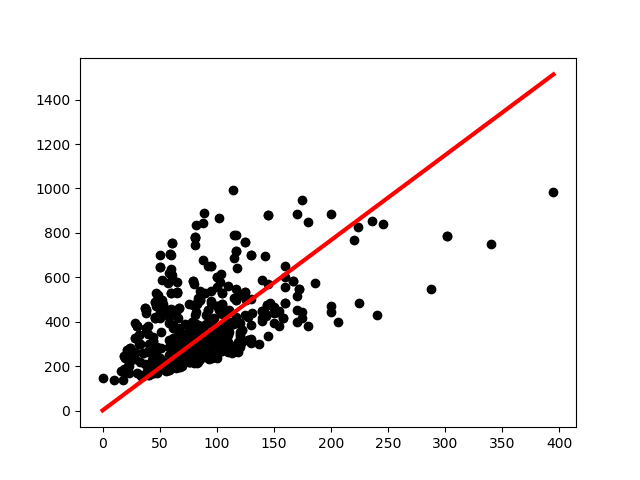

In [33]:
%matplotlib notebook

theta_init=np.array([[0],[-3]],dtype=float)

# calculate the optimal value of theta that minimize cost function
# use alpha <=0.0001 for unnormalized feature and alpha <=0.3 for normalized feature 
theta_opt=grad_descent(grad_cost_func,theta_init,alpha=0.0001,max_iter=250)
print("The optimal value of theta that minimize cost function is: ",theta_opt[:,0])

# predict house price using the calculated value of optimal theta
prediction=np.dot(X,theta_opt)
print("Final error = ",np.sum((prediction-y)**2)/(2*m))

area = 330
price = np.dot(np.array([[1,area]]),theta_opt) # use this price prediction for unnormalized feature
#price = np.dot(np.array([[1,(area-x_1.mean())/x_1.std()]]),theta_opt) # for normalized feature
print("The predicted price of a {0} m² house is: {1} k€".format(area,price[0,0]))

# plot linear model and data
plt.scatter(x_1, y,  color='black')
plt.plot(np.sort(x_1,axis=0),prediction[np.argsort(x_1,axis=0),0], color='red', linewidth=3)
plt.show()


<font color="Green"><u>_**Instructions:**_</u></font>   
- For unnormalized feature: don't forget to comment line: 16, uncomment line: 15 and set $\alpha$=0.0001
- For normalized feature: don't forget to comment line: 15, uncomment line: 16 and set $\alpha$=0.3

<font color="Green"><u>_**Observations:**_</u></font>   
- For unnormalized features, we note that the linear model passes from the origin even when we added the bias term. The problem is that the derivative of the cost function with respect to $\theta_1$ is much bigger than the derivative with respect to $\theta_0$. Hence, we are obliged to set alpha to a very small value (around $10^{-5}$) to ensure convergence. On the other hand, the update of $\theta_0$ will be very small since the derivative ($\frac{\partial J(\theta}{\partial \theta_0}$) and $\alpha$ are small so their product will be very small. Consequently, $theta_0$ won't move a lot from its initial value.   
The value of $\theta_1$ at optimal theta calculated by gradient descent equal to 3,828 which represent the slope of our linear model. This could be interpreted: the mean price of 1 m² in ["ile-de-France"](http://www.efficity.com/prix-immobilier-m2/r_ile-de-france_11/) region is 3.828 k€ (=3 828 €).  

- For normalized features, we fix this problem by scaling all the features to become in the same range and their derivative would be comparable. Thus, we could set $\alpha$ to higher value like 0.3 or 1 without sacrificing the convergence. Consequently, gradient descent algorithm will converge faster and similarly on all the axes to the optimal value of $\theta$.

### Linear regression with 3 features (house area + number of rooms + bias term)

In this part, we will train a linear model for house price prediction using the house area, number of rooms and the bias term that represents the constant term in the linear model equation $~h_\theta(x)=\theta_2 x_2+\theta_1 x_1+\theta_0$.

<font color="blue">**Question 9: **</font>
- Build the matrix X with shape (m,3) that represents 3 features: a column of ones that represents the bias term, a column of house area and a column of number of rooms. 
- Change the value of "n" to be equal to the number of features (number of columns of matrix X equal to 3 in this example).
- Use the calculated "theta_opt" of the new model to estimate the price of a house with 330 m² area and 5 rooms. Compared to the previous model which predict better house prices?

You could also try to add other feature columns to the matrix X like $area^2$ or $area^{0.5}\dots~$ and see the effect on the model and the error.

Cost function for theta=[ 0.  0.  0.] is : 79739.68666666668
Gradient for theta=[ 0.  0.  0.] is : [-364.96333333  -87.90468243  -67.40195053]
The optimal value of theta that minimize cost function is:  [ 364.78337051   90.24656451   -7.04292355]
Final error =  9228.41910044
The predicted price of a 330 m² house with 5 rooms is: 860.6483820008889 k€


<IPython.core.display.Javascript object>


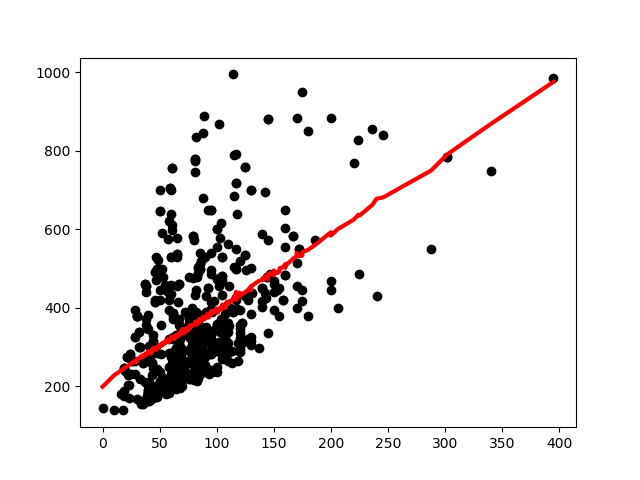

<IPython.core.display.Javascript object>


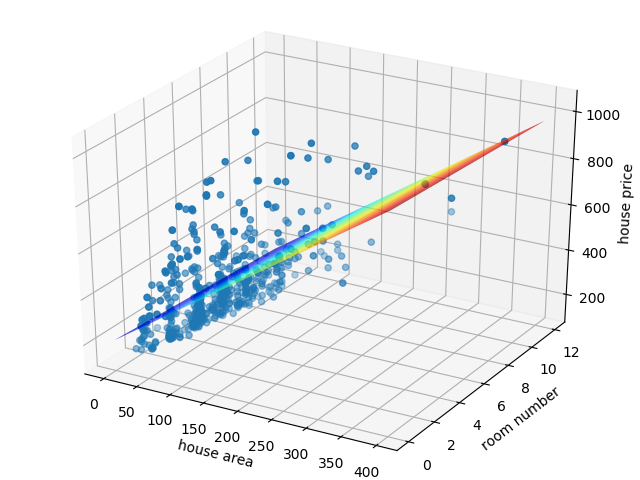

Text(0.5,0,'house price')

In [34]:
%matplotlib notebook
x_1 = house_data[:,0,np.newaxis]
x_2 = house_data[:,1,np.newaxis]
X = np.concatenate((np.ones((m,1)),(x_1-x_1.mean())/x_1.std(),(x_2-x_2.mean())/x_2.std()),axis=1)
n = X.shape[1]

theta0=np.zeros((n,1),dtype=float)
cost = cost_func(theta0)
print("Cost function for theta={0} is : {1}".format(theta0[:,0],cost))

grad=grad_cost_func(theta0)
print("Gradient for theta={0} is : {1}".format(theta0[:,0],grad[:,0]))

theta_opt=grad_descent(grad_cost_func,theta0,alpha=0.03,max_iter=250)
prediction=np.dot(X,theta_opt)
print("The optimal value of theta that minimize cost function is: ",theta_opt[:,0])
print("Final error = ",np.sum((prediction-y)**2)/(2*m))

area = 330
nbr_room = 5
price = np.dot(np.array([[1,(area-x_1.mean())/x_1.std(),(nbr_room-x_2.mean())/x_2.std()]]),theta_opt)
print("The predicted price of a {0} m² house with {1} rooms is: {2} k€".format(area,nbr_room,price[0,0]))

fig=plt.figure('Linear model plot')
plt.scatter(x_1, y,  color='black')
plt.plot(np.sort(x_1,axis=0),prediction[np.argsort(x_1,axis=0),0], color='red', linewidth=3)


fig=plt.figure('Surface plot')
ax=Axes3D(fig)
ax.scatter(x_1,x_2,y)

x1 = np.linspace(0,400,400) 
x2 = np.arange(13)
x1, x2 = np.meshgrid(x1, x2)

X3=np.concatenate((np.ones((*x1.shape,1)),(x1[:,:,np.newaxis]-x_1.mean())/x_1.std(),(x2[:,:,np.newaxis]-x_2.mean())/x_2.std()),axis=-1)
Z =  np.dot(X3,theta_opt)[:,:,0]

ax.plot_surface(x1,x2,Z,rstride=1,cstride=1,cmap=cm.jet,linewidth=1,antialiased=True)
ax.set_xlabel('house area')
ax.set_ylabel('room number')
ax.set_zlabel('house price')

<font color="Green"><u>_**Observations:**_</u></font>  
- The final error of this model (3 features) is smaller than the final error of the previous model (9276.95273131) that means the additional feature (number of room) helps to explain some variance of the price.
- The 2D plot show a non straight line that don't mean we have bugs but the data describe a 3D point and this plot represent a projection of the model on 2D plane. When looking on the 3D plot we note that our model is presented by a plane which is coherent with the linear model (hyperplane in general case).
- We could also replace the third feature (room number) by other features derived from area like $area^2, area^{0.5},\dots$ which allows us to use the same process of training linear model to train more complex model (quadratic, cubic,...).